# TikTok Dataset

## Purposes 

This analysis aims to explore:


**1. What is the distribution of video durations?**

**2. How does engagement (likes, shares, comments) vary with video duration?**

**3. Does the verification status of the author affect the video's performance?**

**4. Are there differences in engagement between videos labeled as 'claim' versus 'opinion'?**

**5. How do engagement metrics vary between author_ban_status?**


## Data Gathering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

In [6]:
tiktok_data = pd.read_csv('tiktok_dataset.csv')

 ## Assessing Data   

In this section, I will detect any cleaning issues in the dataset. 

In [5]:
tiktok_data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [7]:
tiktok_data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
tiktok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [12]:
tiktok_data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

## Cleaning Data 

In [13]:
tiktok_data_clean = tiktok_data.copy()

In [15]:
# Remove rows from your dataset where there are null values
tiktok_data.dropna(inplace=True)

## Exploration 

**1. What is the distribution of video durations?**

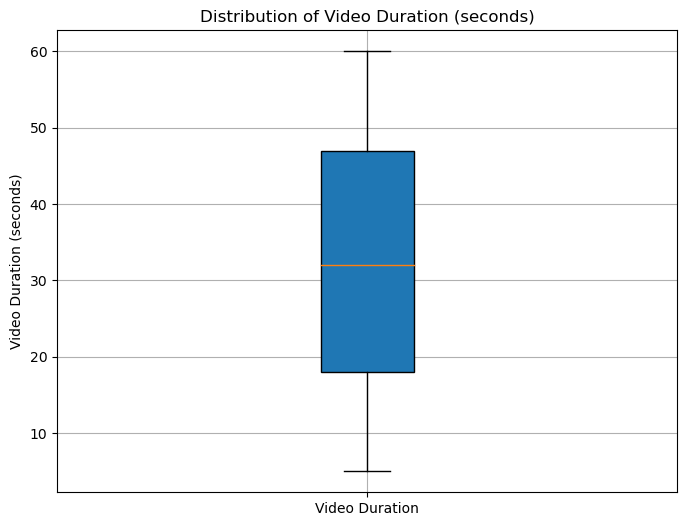

In [33]:
# Create a boxplot to visualize overview distribution of video duration 
plt.figure(figsize=(8, 6))
plt.boxplot(tiktok_data['video_duration_sec'], vert=True, patch_artist=True)
plt.title('Distribution of Video Duration (seconds)')
plt.ylabel('Video Duration (seconds)')
plt.xticks([1], ['Video Duration'])  # Adjust xticks if necessary
plt.grid(True)
plt.show()

The video durations range from 5 seconds to 60 seconds with no outliers. Majority of video durations cluster between the lower 20s and upper 40s, with a median around 30s.


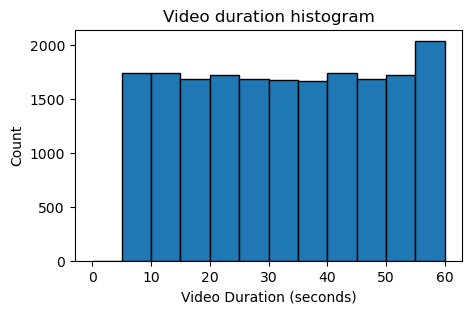

In [28]:
# Define bins from 0 to 60, with an interval of 5 seconds
bins = range(0, 61, 5)

# Plotting the histogram with defined bins
plt.figure(figsize=(5, 3))  # Setting the figure size to match your seaborn plot
plt.hist(tiktok_data['video_duration_sec'], bins=bins, edgecolor='black')
plt.title('Video duration histogram')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Count')

plt.show()

Video durations are mostly evenly distributed across different lengths, with a slight increase in frequency for videos that are around 60 seconds long.

**2. How does engagement (likes, shares, comments) vary with video duration?**

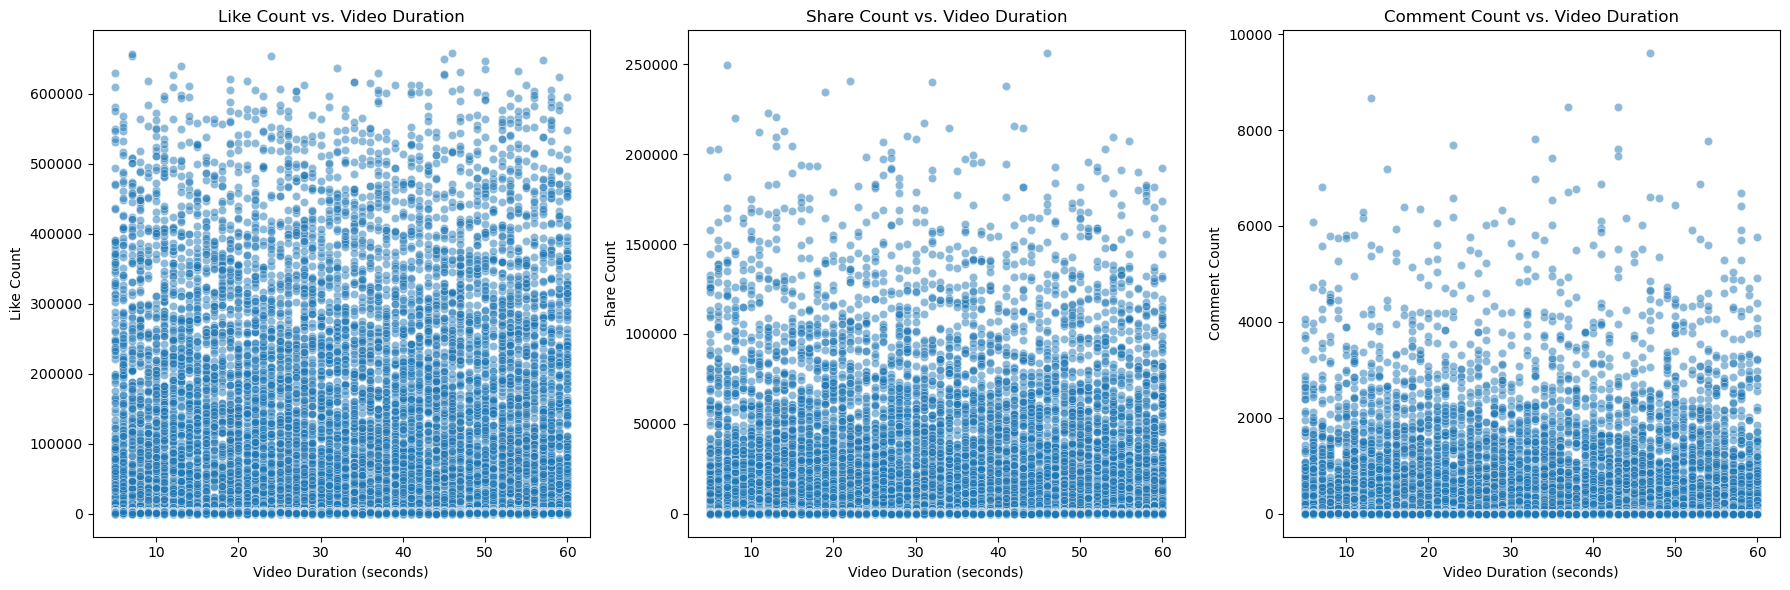

In [30]:
# Set the size of the overall figure
plt.figure(figsize=(18, 6))

# Like Count vs. Video Duration
plt.subplot(1, 3, 1)
sns.scatterplot(data=tiktok_data, x='video_duration_sec', y='video_like_count', alpha=0.5)
plt.title('Like Count vs. Video Duration')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Like Count')

# Share Count vs. Video Duration
plt.subplot(1, 3, 2)
sns.scatterplot(data=tiktok_data, x='video_duration_sec', y='video_share_count', alpha=0.5)
plt.title('Share Count vs. Video Duration')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Share Count')

# Comment Count vs. Video Duration
plt.subplot(1, 3, 3)
sns.scatterplot(data=tiktok_data, x='video_duration_sec', y='video_comment_count', alpha=0.5)
plt.title('Comment Count vs. Video Duration')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Comment Count')

plt.tight_layout()
plt.show()


The relationship between video duration and engagement metrics appears to be inversely related but not strong.  Shorter videos tend to receive marginally more engagement.

**3. Does the verification status of the author affect the video's performance?**

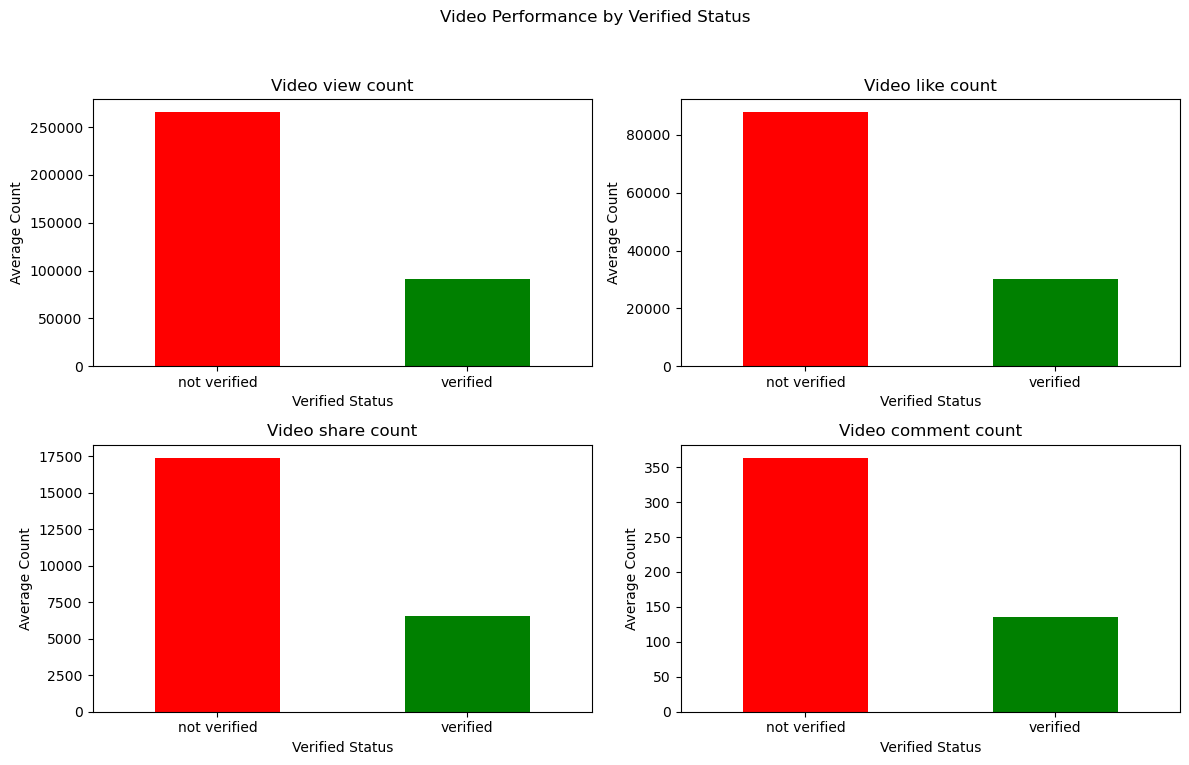

In [45]:
# Group data by verified_status
grouped_data = tiktok_data.groupby('verified_status').mean(numeric_only=True)

# Now we create a bar plot for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 subplot grid for 4 metrics
fig.suptitle('Video Performance by Verified Status')

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each metric
for ax, metric in zip(axs, ['video_view_count', 'video_like_count', 'video_share_count', 'video_comment_count']):
    grouped_data[metric].plot(kind='bar', ax=ax, color=['red', 'green'])
    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_xlabel('Verified Status')
    ax.set_ylabel('Average Count')
    ax.set_xticklabels(grouped_data.index, rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The verification status of the author may not necessarily enhance a video's performance on the platform.

**4. Are there differences in engagement between videos labeled as 'claim' versus 'opinion'?**

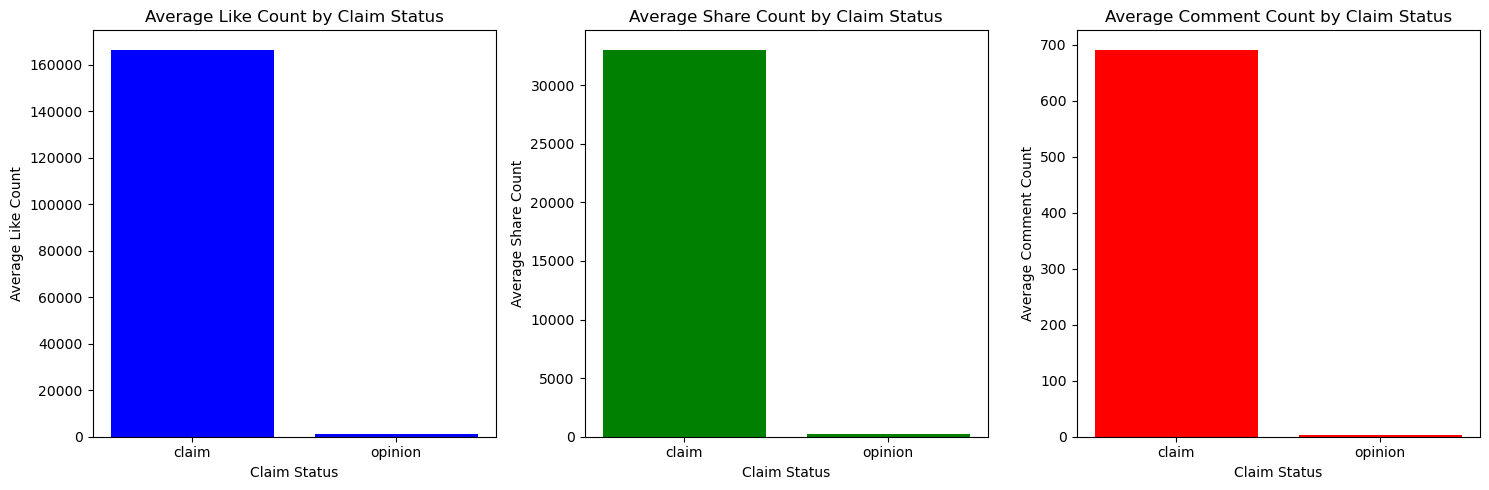

In [57]:
# Group data by claim_status and calculate mean for the engagement metrics
grouped_data = tiktok_data.groupby('claim_status')[['video_like_count', 'video_share_count', 'video_comment_count']].mean(numeric_only=True)

# Create a bar plot for each engagement metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting like count
axes[0].bar(grouped_data.index, grouped_data['video_like_count'], color='blue')
axes[0].set_title('Average Like Count by Claim Status')
axes[0].set_xlabel('Claim Status')
axes[0].set_ylabel('Average Like Count')

# Plotting share count
axes[1].bar(grouped_data.index, grouped_data['video_share_count'], color='green')
axes[1].set_title('Average Share Count by Claim Status')
axes[1].set_xlabel('Claim Status')
axes[1].set_ylabel('Average Share Count')

# Plotting comment count
axes[2].bar(grouped_data.index, grouped_data['video_comment_count'], color='red')
axes[2].set_title('Average Comment Count by Claim Status')
axes[2].set_xlabel('Claim Status')
axes[2].set_ylabel('Average Comment Count')

# Show the plots
plt.tight_layout()
plt.show()

Videos categorized as 'claim' have significantly higher average engagement metrics across likes, shares, and comments than those categorized as 'opinion'. 

**5. How do engagement metrics vary between author_ban_status?**

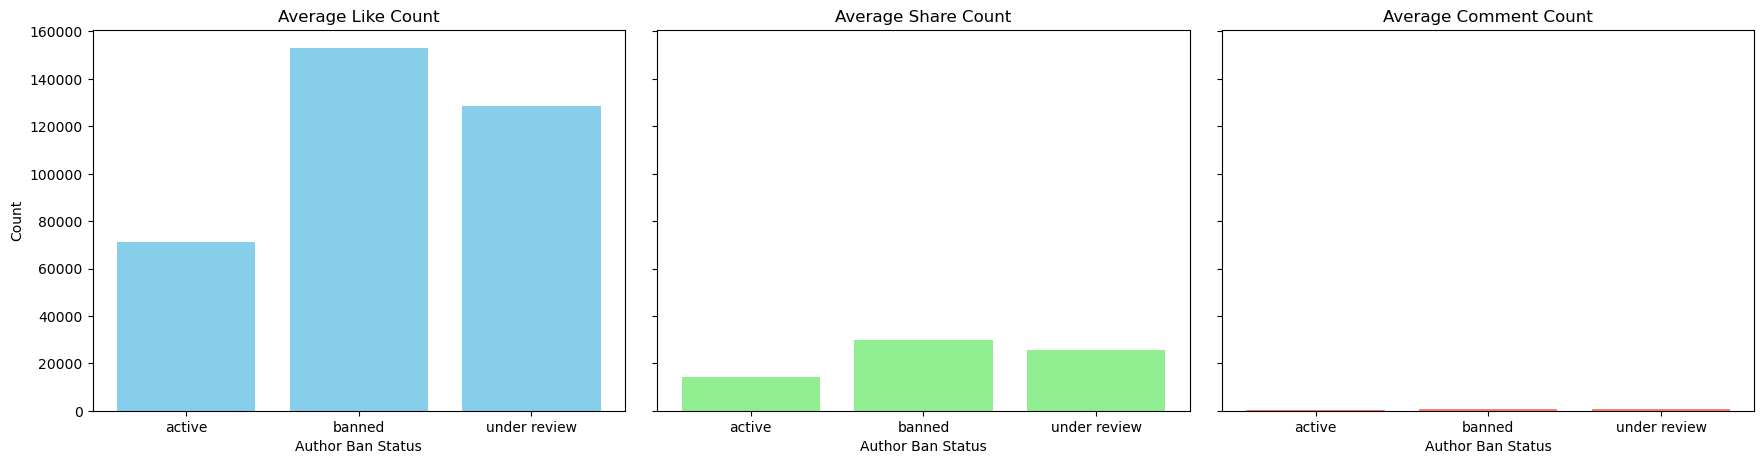

In [54]:
# Calculate the average engagement metrics for each ban status
avg_engagement = tiktok_data.groupby('author_ban_status')[['video_like_count', 'video_share_count', 'video_comment_count']].mean()

# Create a bar plot for each engagement metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plotting like count
axes[0].bar(avg_engagement.index, avg_engagement['video_like_count'], color='skyblue')
axes[0].set_title('Average Like Count')
axes[0].set_xlabel('Author Ban Status')
axes[0].set_ylabel('Count')

# Plotting share count
axes[1].bar(avg_engagement.index, avg_engagement['video_share_count'], color='lightgreen')
axes[1].set_title('Average Share Count')
axes[1].set_xlabel('Author Ban Status')

# Plotting comment count
axes[2].bar(avg_engagement.index, avg_engagement['video_comment_count'], color='salmon')
axes[2].set_title('Average Comment Count')
axes[2].set_xlabel('Author Ban Status')

# Improve the spacing between plots
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

'banned' authors seem to have a notably higher engagement in terms of likes, suggesting that the content from these authors may still attract considerable attention.